In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [24]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_labels.shape

(60000,)

In [27]:
train_images[0].shape

(28, 28)

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

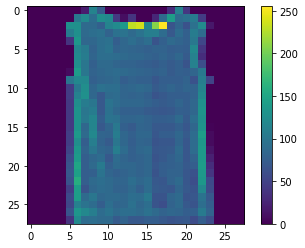

In [29]:
plt.figure()
plt.imshow(train_images[700])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0

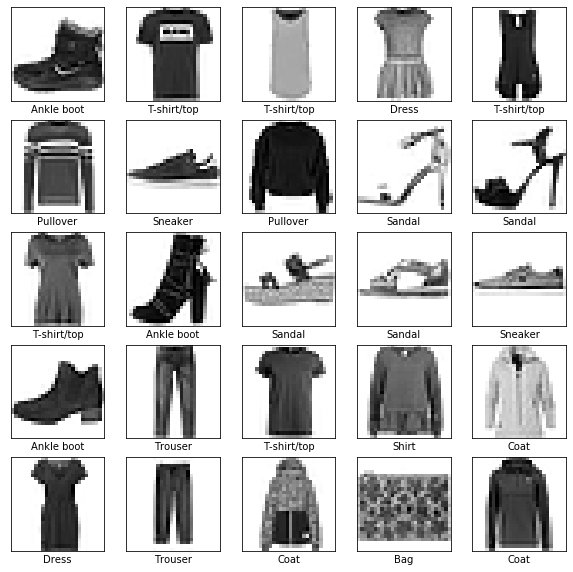

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5028 - acc: 0.8239
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3765 - acc: 0.8646
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3395 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3140 - acc: 0.8848
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2960 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2808 - acc: 0.8964
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2676 - acc: 0.9016
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2575 - acc: 0.9040
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2471 - acc: 0.9071
Epoch 10/10
60000/60000 [==============================] - 4s 66us/sample - loss: 

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3310 - acc: 0.8870

Test accuracy: 0.887


In [36]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(test_images)

In [38]:
predictions[0]

array([1.2259239e-06, 5.2128546e-09, 2.8776370e-09, 2.1986360e-12,
       3.9083176e-08, 2.6720024e-03, 8.2040694e-09, 1.8528121e-02,
       4.5620411e-08, 9.7879857e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

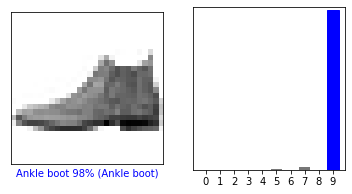

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

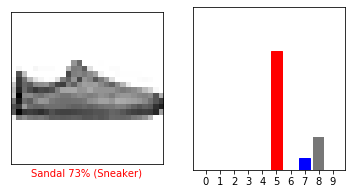

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

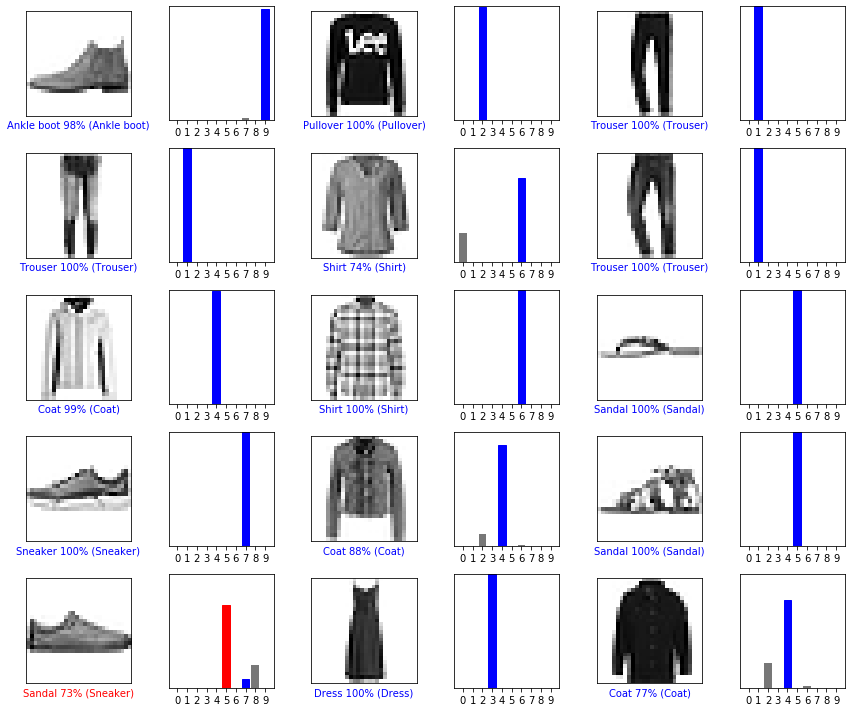

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [45]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [46]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [47]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.21610644e-05 9.51602620e-13 9.96832073e-01 3.59023054e-11
  3.07697058e-03 5.02989927e-10 6.88447617e-05 7.89975344e-13
  1.74085711e-11 1.06093896e-17]]


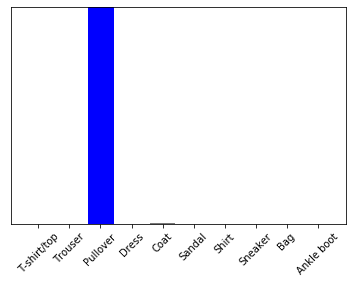

In [48]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [49]:
np.argmax(predictions_single[0])

2